In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("C:/Users/hemat/OneDrive/Desktop/train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
data.shape

(614, 13)

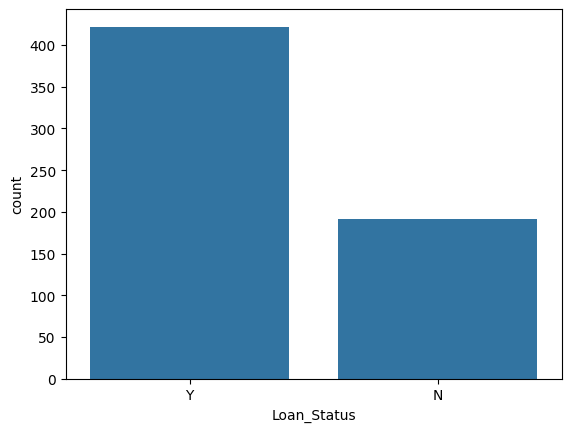

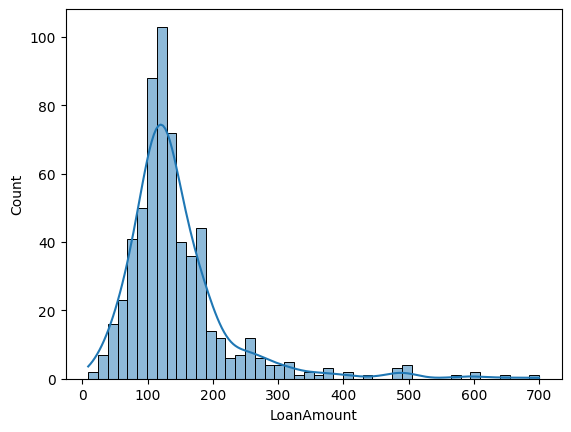

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loan Status Count
sns.countplot(x='Loan_Status', data=data)
plt.show()

# Loan Amount Distribution
sns.histplot(data['LoanAmount'], kde=True)
plt.show()

In [7]:
data = data.drop('Loan_ID', axis=1)

In [8]:
# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [9]:
from sklearn.model_selection import train_test_split

X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(solver='saga',max_iter=1000)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

print("Accuracy:\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:
 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



ROC-AUC Score: 0.7386627906976744


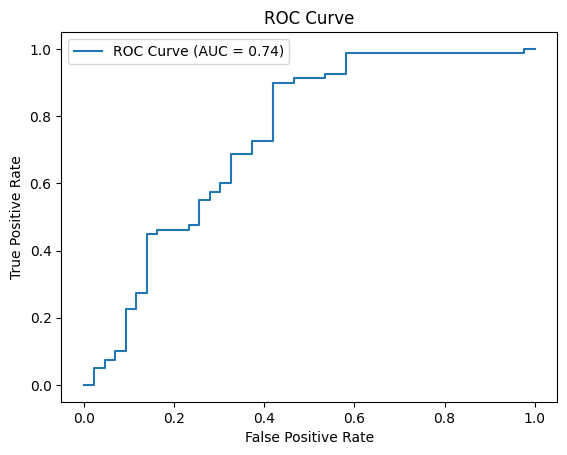

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [12]:

# Example of new loan applicants' information (multiple applicants)
new_data = pd.DataFrame({
    'Loan_ID':['LP003001','LP003002','LP003003','LP003004'],
    'Gender': [1, 0, 1, 0],  # 1 for Male, 0 for Female
    'Married': [1, 0, 1, 0],  # 0 for No, 1 for Yes
    'Dependents': [1, 0, 2, 0],  # Number of dependents
    'Education': [0, 1, 0, 1],  # 0 for Graduate, 1 for Not Graduate
    'Self_Employed': [0, 1, 0, 1],  # 0 for No, 1 for Yes
    'ApplicantIncome': [5000, 3000, 7000, 4000],  # Applicant's income
    'CoapplicantIncome': [1500, 1000, 3000, 1200],  # Coapplicant's income
    'LoanAmount': [200, 150, 250, 180],  # Loan amount requested
    'Loan_Amount_Term': [360, 240, 360, 180],  # Loan term in months
    'Credit_History': [1, 0, 1, 0],  # 1 if credit history is good, 0 otherwise
    'Property_Area': [1, 2, 0, 1]  # 2 for Urban, 0 for Rural, 1 for Semiurban
})
new_data=new_data.drop(['Loan_ID'],axis=1)

# Predict loan status for the new data (multiple applicants)
predictions = model.predict(new_data.to_numpy())
# Output the predictions
for i, prediction in enumerate(predictions):
    applicant_status = "Loan Approved" if prediction == 1 else "Loan Rejected"
    print(f"Applicant {i+1}: {applicant_status}")


Applicant 1: Loan Rejected
Applicant 2: Loan Rejected
Applicant 3: Loan Rejected
Applicant 4: Loan Rejected
